In [1]:
import sys
import numpy as np
import random
import math
from model import W_Net
from eval.eval_by_cropping import eval_model
from Dataset.TrainDatasetConstructor import TrainDatasetConstructor
from Dataset.EvalDatasetConstructor import EvalDatasetConstructor
from metrics import JointLoss, AEBatch, SEBatch
from PIL import Image
import time
import torch
# torch.backends.cudnn.benchmark=True
%matplotlib inline

In [2]:
list_1 = []
print(np.mean(list_1))

nan


/home/zzn/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/zzn/.local/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [2]:
# config
config = {
'SHANGHAITECH': 'A',
'min_RATE':10000000,
'min_MAE':10240000,
'min_MSE':10240000,
'eval_num':182,
'train_num':300,
'learning_rate': 1e-4,
'train_batch_size': 10,
'epoch': 10000,
'eval_per_step': 150,
'mode':'crop'
}
img_dir = "/home/zzn/Documents/Datasets/part_" + config['SHANGHAITECH'] + "_final/train_data/images"
gt_dir = "/home/zzn/Documents/Datasets/part_" + config['SHANGHAITECH'] + "_final/train_data/gt_map_w_net"
binary_dir = "/home/zzn/Documents/Datasets/part_" + config['SHANGHAITECH'] + "_final/train_data/blur_map_w_net"
img_dir_t = "/home/zzn/Documents/Datasets/part_" + config['SHANGHAITECH'] + "_final/test_data/images"
gt_dir_t = "/home/zzn/Documents/Datasets/part_" + config['SHANGHAITECH'] + "_final/test_data/gt_map_w_net"
binary_dir_t = "/home/zzn/Documents/Datasets/part_" + config['SHANGHAITECH'] + "_final/test_data/blur_map_w_net"
model_save_path = "/home/zzn/PycharmProjects/W-Net_pytorch/checkpoints/model_w_net.pkl"

In [3]:
# data_load
train_dataset = TrainDatasetConstructor(img_dir, gt_dir, binary_dir, config['train_num'], mode=config['mode'], if_random_hsi=True, if_flip=True)
eval_dataset = EvalDatasetConstructor(img_dir_t, gt_dir_t, config['eval_num'], mode=config['mode'])
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=config['train_batch_size'])
eval_loader = torch.utils.data.DataLoader(dataset=eval_dataset, batch_size=1)

In [4]:
# obtain the gpu device
assert torch.cuda.is_available()
cuda_device = torch.device("cuda")

# model construct
net = W_Net().cuda()
# net = torch.load("/home/zzn/PycharmProjects/W-Net_pytorch/checkpoints/model_w_net.pkl")
# set optimizer and estimator

optimizer_1 = torch.optim.Adam(net.parameters(), config['learning_rate'], weight_decay=5e-3)
optimizer_2 = torch.optim.Adam(net.parameters(), config['learning_rate'], weight_decay=5e-3)
# criterion = JointLoss(alpha=100000, beta=6).cuda()
criterion_mseloss = torch.nn.MSELoss(size_average=False).cuda()
criterion_bceloss = torch.nn.BCELoss(size_average=True).cuda()
ae_batch = AEBatch().cuda()
se_batch = SEBatch().cuda()
modules = {'model':net, 'ae':ae_batch, 'se':se_batch}

/home/zzn/anaconda3/envs/pytorch/lib/python3.6/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
/home/zzn/anaconda3/envs/pytorch/lib/python3.6/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


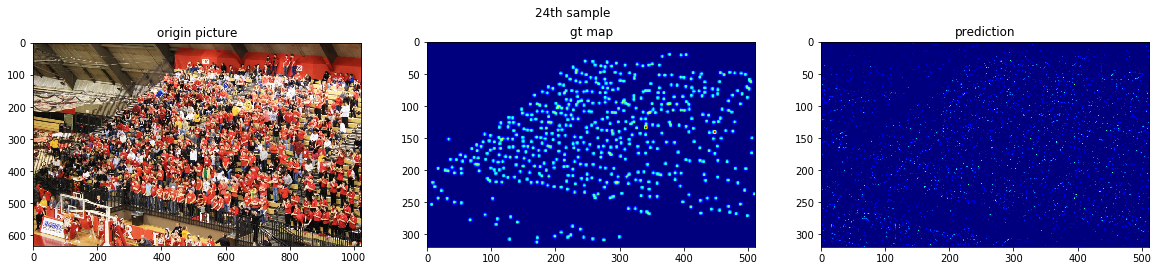

The gt counts of the above sample:552.89404296875, and the pred counts:0.0512852817773819
In step 0, epoch 1,  MAE = 432.3670959472656, MSE = 557.9244384765625, time cost eval = 25.715508937835693s

 In epoch 0, the mseloss = 60.15773363908132, the bceloss = 33.433624585469566,, time_cost = 17.27856993675232s

 In epoch 1, the mseloss = 47.703217347462974, the bceloss = 17.48934555053711,, time_cost = 17.322656869888306s

 In epoch 2, the mseloss = 41.508230765660606, the bceloss = 14.622133096059164,, time_cost = 17.32893204689026s

 In epoch 3, the mseloss = 44.12399903933207, the bceloss = 14.398077170054117,, time_cost = 17.34672713279724s

 In epoch 4, the mseloss = 41.794385512669884, the bceloss = 13.013707478841146,, time_cost = 17.334639310836792s

 In epoch 5, the mseloss = 38.65131481488546, the bceloss = 12.704858620961508,, time_cost = 17.340144157409668s

 In epoch 6, the mseloss = 41.987786054611206, the bceloss = 13.768014113108316,, time_cost = 17.338844299316406s

 In

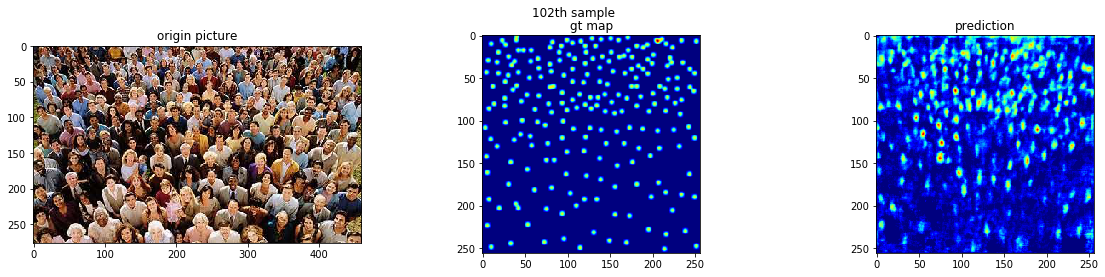

The gt counts of the above sample:222.59849548339844, and the pred counts:312.0900573730469
In step 300, epoch 11,  MAE = 136.53590393066406, MSE = 175.01373291015625, time cost eval = 23.76451539993286s

 In epoch 10, the mseloss = 38.33050513267517, the bceloss = 14.711249987284342,, time_cost = 17.32176113128662s

 In epoch 11, the mseloss = 36.1646413008372, the bceloss = 12.852623780568441,, time_cost = 17.34030771255493s

 In epoch 12, the mseloss = 32.82233707110087, the bceloss = 15.280829747517904,, time_cost = 17.335119009017944s

 In epoch 13, the mseloss = 35.17352922757467, the bceloss = 14.123621622721354,, time_cost = 17.336238145828247s

 In epoch 14, the mseloss = 31.865389744440716, the bceloss = 16.598426183064777,, time_cost = 17.325059413909912s

 In epoch 15, the mseloss = 32.98613731066386, the bceloss = 12.39514970779419,, time_cost = 17.338440418243408s

 In epoch 16, the mseloss = 33.29630438486735, the bceloss = 15.202014923095703,, time_cost = 17.33655428886

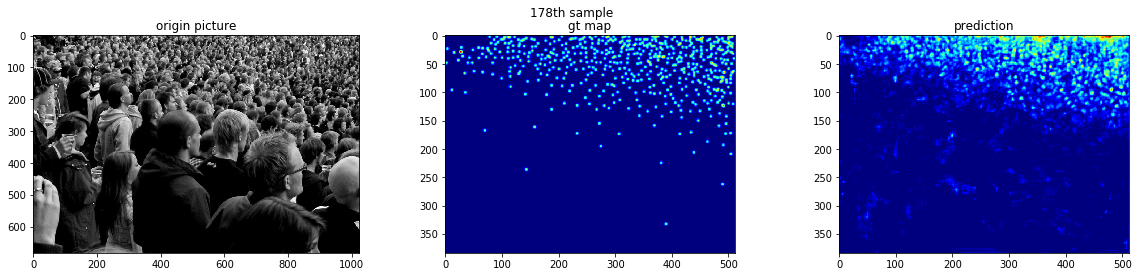

The gt counts of the above sample:546.519287109375, and the pred counts:575.1661987304688
In step 600, epoch 21,  MAE = 85.3232192993164, MSE = 125.0484390258789, time cost eval = 23.738807916641235s

 In epoch 20, the mseloss = 31.18038574854533, the bceloss = 14.6478058497111,, time_cost = 17.310869932174683s

 In epoch 21, the mseloss = 33.35065237681071, the bceloss = 14.7677321434021,, time_cost = 17.338244915008545s

 In epoch 22, the mseloss = 35.02521228790283, the bceloss = 14.006728808085123,, time_cost = 17.328993558883667s

 In epoch 23, the mseloss = 29.01118493080139, the bceloss = 14.538408120473227,, time_cost = 17.347671270370483s

 In epoch 24, the mseloss = 32.54393172264099, the bceloss = 14.254329045613607,, time_cost = 17.33615493774414s

 In epoch 25, the mseloss = 31.67396839459737, the bceloss = 13.43676471710205,, time_cost = 17.33669376373291s

 In epoch 26, the mseloss = 34.490098317464195, the bceloss = 14.531467914581299,, time_cost = 17.321807384490967s



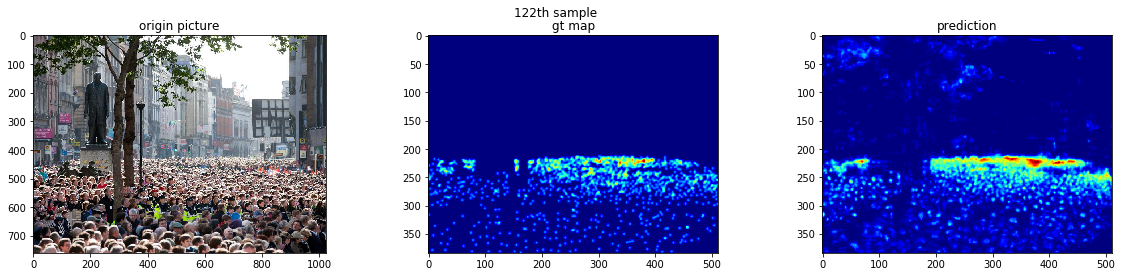

The gt counts of the above sample:1149.5618896484375, and the pred counts:942.0609741210938
In step 900, epoch 31,  MAE = 98.03250885009766, MSE = 133.63453674316406, time cost eval = 23.721922636032104s

 In epoch 30, the mseloss = 30.46755075454712, the bceloss = 14.030761559804281,, time_cost = 17.332465410232544s

 In epoch 31, the mseloss = 28.86278160413106, the bceloss = 15.324917316436768,, time_cost = 17.34108877182007s

 In epoch 32, the mseloss = 29.520011862119038, the bceloss = 15.85787057876587,, time_cost = 17.34539294242859s

 In epoch 33, the mseloss = 30.821014324824016, the bceloss = 12.925431251525879,, time_cost = 17.344982862472534s

 In epoch 34, the mseloss = 29.555145899454754, the bceloss = 15.106374899546305,, time_cost = 17.329854726791382s

 In epoch 35, the mseloss = 30.68498206138611, the bceloss = 15.546753088633219,, time_cost = 17.327260494232178s

 In epoch 36, the mseloss = 28.96587038040161, the bceloss = 12.629380544026693,, time_cost = 17.35526347

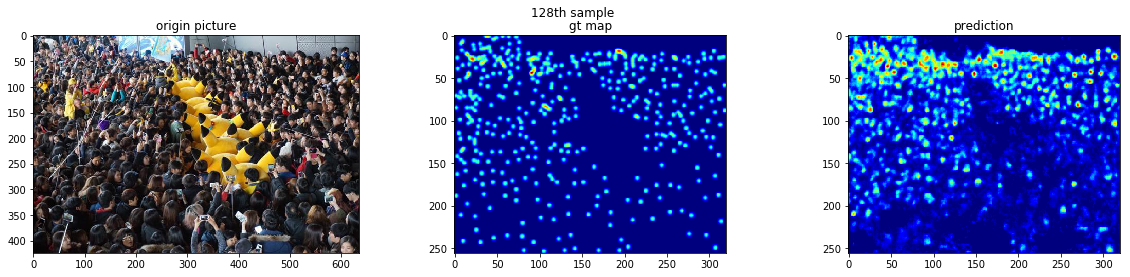

The gt counts of the above sample:416.958984375, and the pred counts:361.210693359375
In step 1200, epoch 41,  MAE = 77.27901458740234, MSE = 118.63701629638672, time cost eval = 23.73611569404602s

 In epoch 40, the mseloss = 28.01486603418986, the bceloss = 12.455373922983805,, time_cost = 17.312427520751953s

 In epoch 41, the mseloss = 28.515333493550617, the bceloss = 15.076080004374186,, time_cost = 17.34492564201355s

 In epoch 42, the mseloss = 29.63039755821228, the bceloss = 14.34154717127482,, time_cost = 17.34387755393982s

 In epoch 43, the mseloss = 28.865506172180176, the bceloss = 13.93544054031372,, time_cost = 17.35129690170288s

 In epoch 44, the mseloss = 29.583045879999798, the bceloss = 15.673490365346273,, time_cost = 17.337406635284424s

 In epoch 45, the mseloss = 30.210334142049152, the bceloss = 15.604325771331787,, time_cost = 17.344522714614868s

 In epoch 46, the mseloss = 28.698562304178875, the bceloss = 13.444326082865397,, time_cost = 17.32977771759033

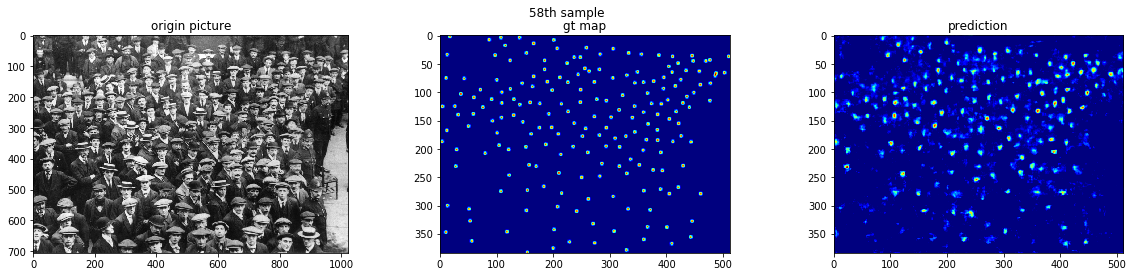

The gt counts of the above sample:197.58616638183594, and the pred counts:209.48922729492188
In step 1500, epoch 51,  MAE = 80.14745330810547, MSE = 119.8829116821289, time cost eval = 23.728245496749878s

 In epoch 50, the mseloss = 27.996067841847736, the bceloss = 17.8960542678833,, time_cost = 17.351430654525757s

 In epoch 51, the mseloss = 27.41878843307495, the bceloss = 17.116869290669758,, time_cost = 17.3365421295166s

 In epoch 52, the mseloss = 25.587968746821087, the bceloss = 15.99234930674235,, time_cost = 17.326817989349365s

 In epoch 53, the mseloss = 26.39946202437083, the bceloss = 17.09657112757365,, time_cost = 17.33756685256958s

 In epoch 54, the mseloss = 27.50106644630432, the bceloss = 15.914432207743326,, time_cost = 17.33846688270569s

 In epoch 55, the mseloss = 26.743321458498638, the bceloss = 14.04771614074707,, time_cost = 17.33606219291687s

 In epoch 56, the mseloss = 26.740915179252625, the bceloss = 17.133023897806805,, time_cost = 17.3481850624084

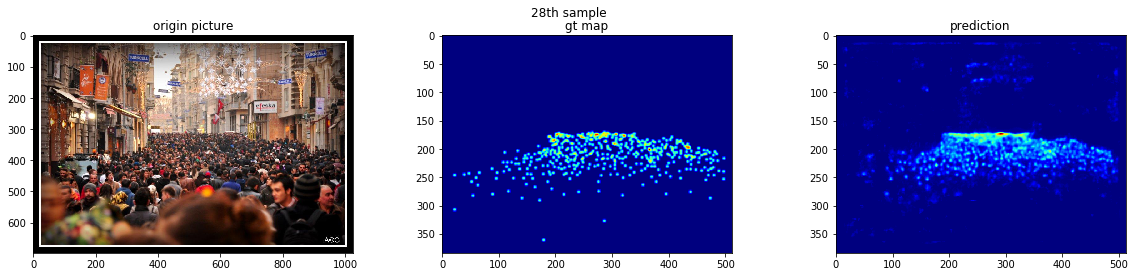

The gt counts of the above sample:423.0, and the pred counts:475.48931884765625
In step 1800, epoch 61,  MAE = 81.87693786621094, MSE = 125.40908813476562, time cost eval = 23.697235345840454s

 In epoch 60, the mseloss = 27.083981037139893, the bceloss = 14.246227423350016,, time_cost = 17.35777497291565s

 In epoch 61, the mseloss = 27.993948380152386, the bceloss = 13.50443442662557,, time_cost = 17.34316635131836s

 In epoch 62, the mseloss = 26.796118299166363, the bceloss = 15.320921738942465,, time_cost = 17.338664293289185s

 In epoch 63, the mseloss = 26.84495468934377, the bceloss = 14.122918923695883,, time_cost = 17.34632921218872s

 In epoch 64, the mseloss = 24.896592140197754, the bceloss = 16.31325562795003,, time_cost = 17.32256531715393s

 In epoch 65, the mseloss = 26.65948462486267, the bceloss = 15.854773998260498,, time_cost = 17.33666181564331s

 In epoch 66, the mseloss = 27.09953538576762, the bceloss = 14.515145778656006,, time_cost = 17.335897207260132s

 In 

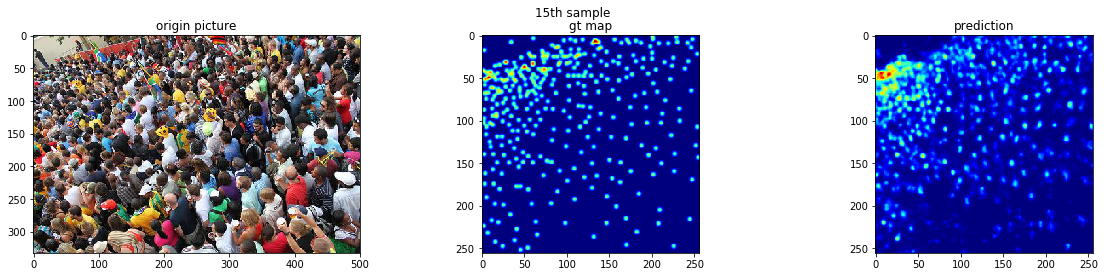

The gt counts of the above sample:339.3295593261719, and the pred counts:325.0740051269531
In step 2100, epoch 71,  MAE = 78.6456069946289, MSE = 123.60633850097656, time cost eval = 23.73544478416443s

 In epoch 70, the mseloss = 28.47373652458191, the bceloss = 13.319516658782959,, time_cost = 17.351449728012085s

 In epoch 71, the mseloss = 28.09866778055827, the bceloss = 13.974501609802246,, time_cost = 17.352588415145874s

 In epoch 72, the mseloss = 26.901111443837483, the bceloss = 12.7042285601298,, time_cost = 17.350066661834717s

 In epoch 73, the mseloss = 25.090818524360657, the bceloss = 14.544657707214355,, time_cost = 17.33574151992798s

 In epoch 74, the mseloss = 25.36871560414632, the bceloss = 13.354648272196451,, time_cost = 17.346838235855103s

 In epoch 75, the mseloss = 26.184341231981914, the bceloss = 14.144891421000162,, time_cost = 17.3447744846344s

 In epoch 76, the mseloss = 26.63751490910848, the bceloss = 14.24827512105306,, time_cost = 17.3557145595550

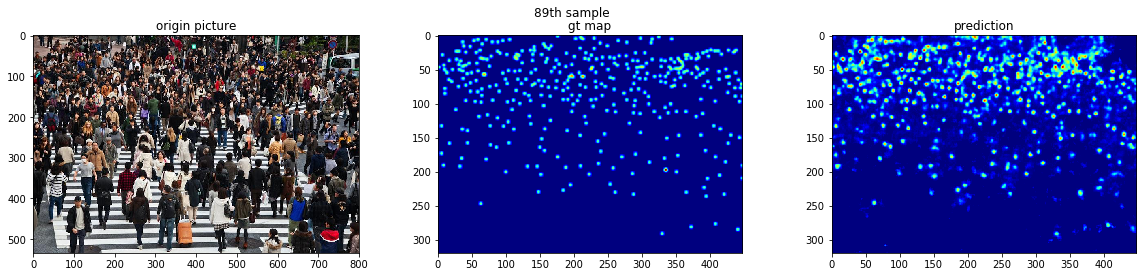

The gt counts of the above sample:381.3034973144531, and the pred counts:479.05499267578125
In step 2400, epoch 81,  MAE = 84.77806854248047, MSE = 127.71636199951172, time cost eval = 23.70266628265381s

 In epoch 80, the mseloss = 25.42124358812968, the bceloss = 14.251127243041992,, time_cost = 17.34392499923706s

 In epoch 81, the mseloss = 25.436925331751507, the bceloss = 14.043174107869467,, time_cost = 17.354135513305664s

 In epoch 82, the mseloss = 25.53015621503194, the bceloss = 14.136625289916992,, time_cost = 17.34535527229309s

 In epoch 83, the mseloss = 25.478859941164654, the bceloss = 14.228685220082602,, time_cost = 17.336718797683716s

 In epoch 84, the mseloss = 24.903777241706848, the bceloss = 13.357980251312256,, time_cost = 17.337342262268066s

 In epoch 85, the mseloss = 23.755467732747395, the bceloss = 12.889710108439127,, time_cost = 17.335910081863403s

 In epoch 86, the mseloss = 25.91108775138855, the bceloss = 15.473384698232016,, time_cost = 17.348883

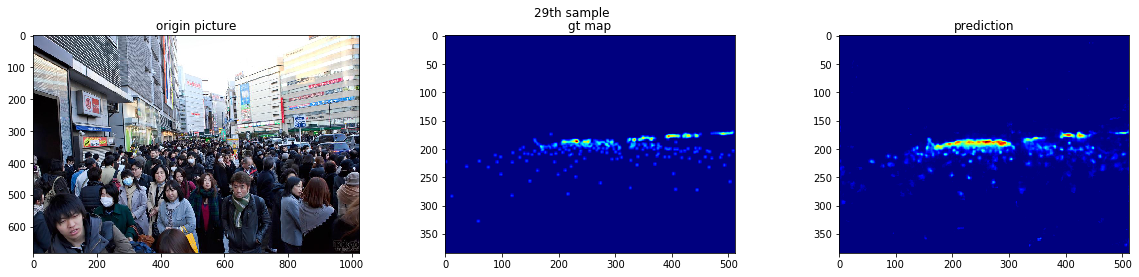

The gt counts of the above sample:308.7265930175781, and the pred counts:252.7593536376953
In step 2700, epoch 91,  MAE = 72.80672454833984, MSE = 110.45243072509766, time cost eval = 23.702131748199463s

 In epoch 90, the mseloss = 26.439050436019897, the bceloss = 14.19213835398356,, time_cost = 17.318878412246704s

 In epoch 91, the mseloss = 26.184035778045654, the bceloss = 15.92006222407023,, time_cost = 17.349926710128784s

 In epoch 92, the mseloss = 26.11087628205617, the bceloss = 14.682683308919271,, time_cost = 17.361634969711304s

 In epoch 93, the mseloss = 24.735333919525146, the bceloss = 16.882235685984295,, time_cost = 17.32838797569275s

 In epoch 94, the mseloss = 27.165862878163654, the bceloss = 13.349912802378336,, time_cost = 17.337077379226685s

 In epoch 95, the mseloss = 25.218064188957214, the bceloss = 13.822283585866293,, time_cost = 17.352102041244507s

 In epoch 96, the mseloss = 24.642969846725464, the bceloss = 14.870197296142578,, time_cost = 17.33867

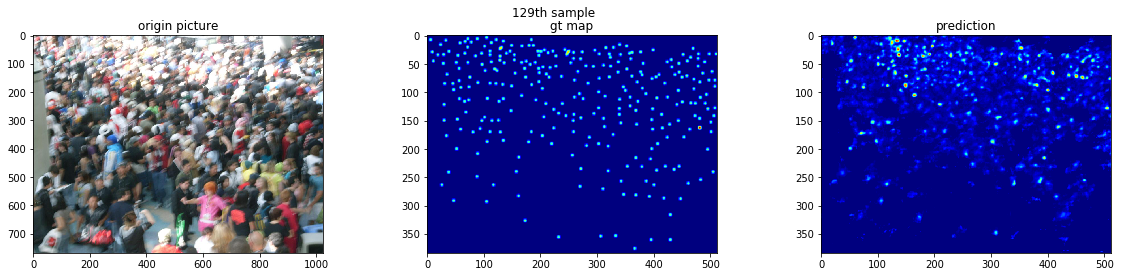

The gt counts of the above sample:297.7495422363281, and the pred counts:218.19326782226562
In step 3000, epoch 101,  MAE = 83.06297302246094, MSE = 123.61568450927734, time cost eval = 23.71576428413391s

 In epoch 100, the mseloss = 24.734431902567547, the bceloss = 15.339446067810059,, time_cost = 17.350730657577515s


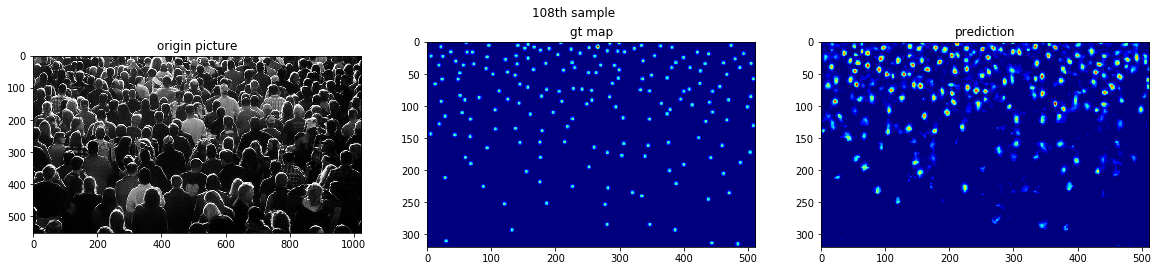

The gt counts of the above sample:181.70770263671875, and the pred counts:177.70065307617188
In step 3030, epoch 102,  MAE = 68.26280212402344, MSE = 110.44470977783203, time cost eval = 23.72323226928711s

 In epoch 101, the mseloss = 25.957575798034668, the bceloss = 14.825637499491373,, time_cost = 17.34518575668335s


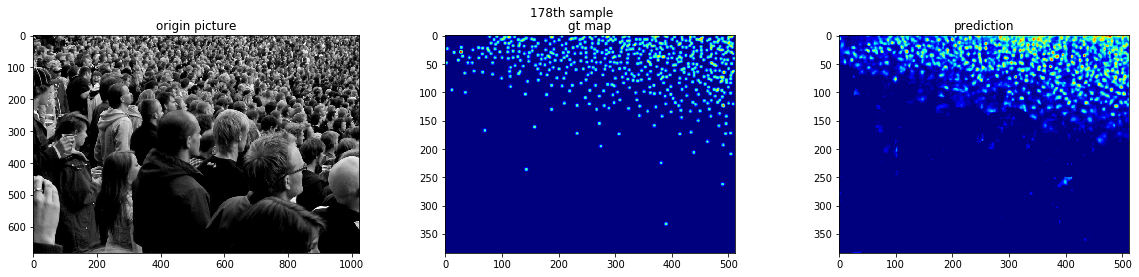

The gt counts of the above sample:546.519287109375, and the pred counts:543.8184204101562
In step 3060, epoch 103,  MAE = 72.40750885009766, MSE = 116.09119415283203, time cost eval = 23.71672749519348s

 In epoch 102, the mseloss = 25.076073845227558, the bceloss = 13.503450711568197,, time_cost = 17.344024419784546s


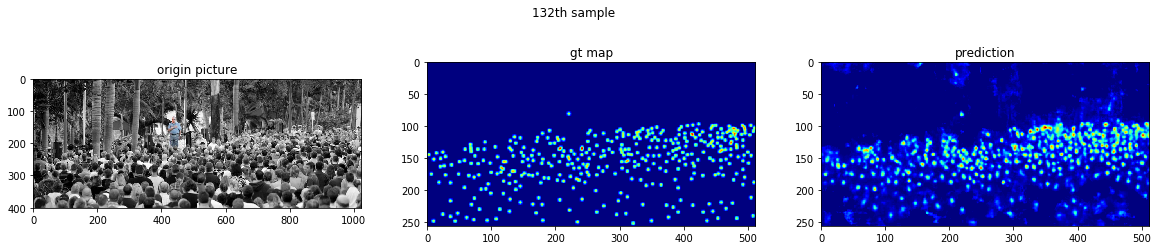

The gt counts of the above sample:374.7492980957031, and the pred counts:399.5245056152344
In step 3090, epoch 104,  MAE = 76.18083953857422, MSE = 115.97149658203125, time cost eval = 23.717170238494873s

 In epoch 103, the mseloss = 23.882409890492756, the bceloss = 13.221826553344727,, time_cost = 17.35117530822754s


In [ ]:
step = 0
# torch.cuda.empty_cache()
for epoch_index in range(config['epoch']):
    dataset = train_dataset.shuffle()
    mse_loss_list = []
    bce_loss_list = []
    time_per_epoch = 0
    
    if epoch_index == 50:
        config['eval_per_step'] = 30
    
    for train_img_index, train_img, train_gt, train_binary in train_loader:
        if step % config['eval_per_step'] == 0:
            validate_MAE, validate_RMSE, time_cost = eval_model(config, eval_loader, modules, True)
            
            sys.stdout.write('In step {}, epoch {},  MAE = {}, MSE = {}, time cost eval = {}s\n'.format(step, epoch_index + 1, validate_MAE, validate_RMSE, time_cost))
            sys.stdout.flush()
            
#             save model
            if config['min_MAE'] > validate_MAE:
                config['min_MAE'] = validate_MAE
                torch.save(net, model_save_path)
#             torch.save(net, "/home/zzn/Downloads/CSRNet_pytorch-master/checkpoints/model_in_time.pkl")
            
            # return train model
        net.train()
        torch.cuda.empty_cache()
        
#         loss = criterion(prediction, y, z)
        if epoch_index % 5 == 0:
            optimizer_2.zero_grad()
            # B
            x = train_img
            y = train_gt
            z = train_binary
            start = time.time()
            prediction = net(x)
            loss = criterion_bceloss(prediction, z) * 5
            bce_loss_list.append(loss.data.item())
            loss.backward()
            optimizer_2.step()
        
        else:
            optimizer_1.zero_grad()
                # B
            x = train_img
            y = train_gt
            z = train_binary
            start = time.time()
            prediction = net(x)
            loss = criterion_mseloss(prediction, y)
            mse_loss_list.append(loss.data.item())
            loss.backward()
            optimizer_1.step()
        step += 1
        torch.cuda.synchronize()
        end2 = time.time()
#         if step == 400 * 100 or step == 400 * 1000 or step == 400 * 500:
#             config['eval_per_step'] = eval_steps_adaptive(step)
        time_per_epoch += end2 - start
    if len(epoch_mse_loss) > 0:
        epoch_mse_loss = np.mean(mse_loss_list)
    else:
        epoch_mse_loss = -1
    if len(bce_loss_list) > 0:
        epoch_bce_loss = np.mean(bce_loss_list)
    else:
        epoch_bce_loss = -1
    sys.stdout.write('\n In epoch {}, the mseloss = {}, the bceloss = {},, time_cost = {}s\n'.format(epoch_index, epoch_mse_loss, epoch_bce_loss, time_per_epoch))
    sys.stdout.flush()

In [6]:
torch.save(net, "/home/zzn/PycharmProjects/W-Net_pytorch/checkpoints/model_w_net.pkl")

In [4]:
# print((10 * 3 * 400 * 400 * 4 + 9 * 3 * 384 * 512) / 1024/1024)
# print(17001922 * 4 / 1024 / 1024) 97 -25 = 72 169 - 97 = 72
# print(768 * 1024 / 400 / 400)
import numpy as np
tmp_maps = []
tmp_maps.append(768 * 1024 * 64 * 4 * 2 / 1024 / 1024)
tmp_maps.append(384 * 512 * 128 * 4 * 2 / 1024 / 1024)
tmp_maps.append(192 * 256 * 256 * 4 * 3 / 1024 / 1024)
tmp_maps.append(96 * 128 * 512 * 4 * 3 / 1024 / 1024)
tmp_maps.append(48 * 64 * 512 * 4 * 3 / 1024 / 1024)
print(np.sum(tmp_maps))
print(96 * 128 * 1024 * 4 / 1024 / 1024 )
print(96 * 128 * 256 * 4 * 2/ 1024 / 1024 )
print(tmp_maps[0])
print(384 * 2)

810.0
48.0
24.0
384.0
768


In [ ]:
b = torch.randn(10, 3, 400, 400).cuda()
net = W_Net().cuda()
c = net(b)
# a = torch.randn(1, 3, 768, 1024).cuda()
# b = torch.randn(9, 3, 384, 512).cuda()
# with torch.no_grad():
#     c = net(b)
#     torch.cuda.empty_cache()
# params = net.parameters()

In [4]:
# net = torch.load("/home/zzn/PycharmProjects/W-Net_pytorch/checkpoints/model_w_net.pkl")
net = W_Net().cuda()
criterion = JointLoss(alpha=100000, beta=10).cuda()
for train_img_index, train_img, train_gt, train_binary in train_loader:
    x = train_img
    y = train_gt
    z = train_binary
    start = time.time()
    prediction = net(x)
    loss = criterion(prediction, y, z)


/home/zzn/anaconda3/envs/pytorch/lib/python3.6/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


tensor(0.3582, device='cuda:0', grad_fn=<MulBackward0>) tensor(46.8459, device='cuda:0', grad_fn=<MulBackward0>)
torch.Size([10, 1, 200, 200])
tensor(-0.0048, device='cuda:0', grad_fn=<MeanBackward1>)
